## Checking distribution results of the name generation

In [2]:
## data is in names_dist.jsonl

import json

file=open('names_dist.jsonl','r')

data = file.readlines()

file.close()

In [4]:
## the names data is inside the names_counter key

names = json.loads(data[0])['names_counter']


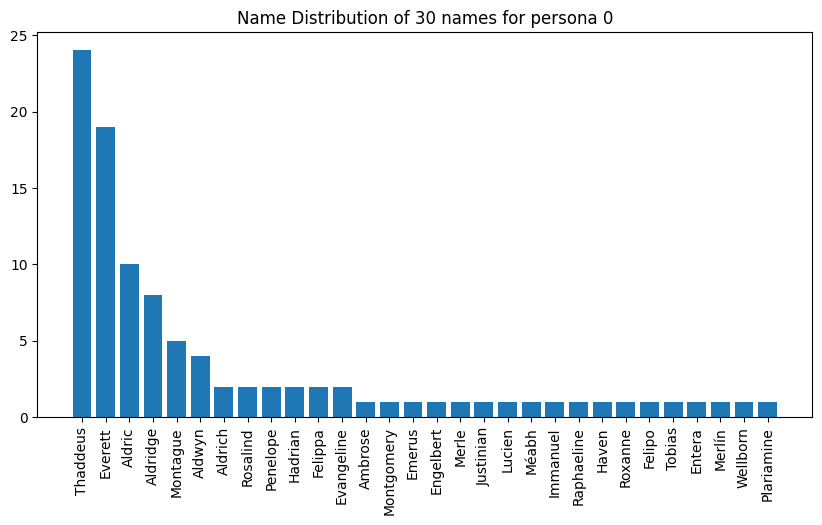

In [12]:
# plot name distplot


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.bar(names.keys(),names.values())

plt.title(f"Name Distribution of {len(names)} names for persona 0")

plt.xticks(rotation=90)

plt.show()

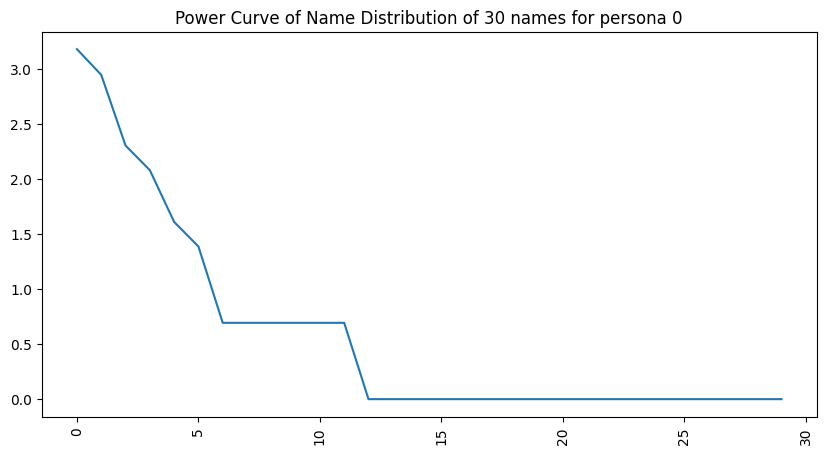

In [16]:
## plot the power curve of the names

import numpy as np

plt.figure(figsize=(10,5))

plt.plot(np.log(list(names.values())),label='log of name distribution')


plt.title(f"Power Curve of Name Distribution of {len(names)} names for persona 0")

plt.xticks(rotation=90)

plt.show()


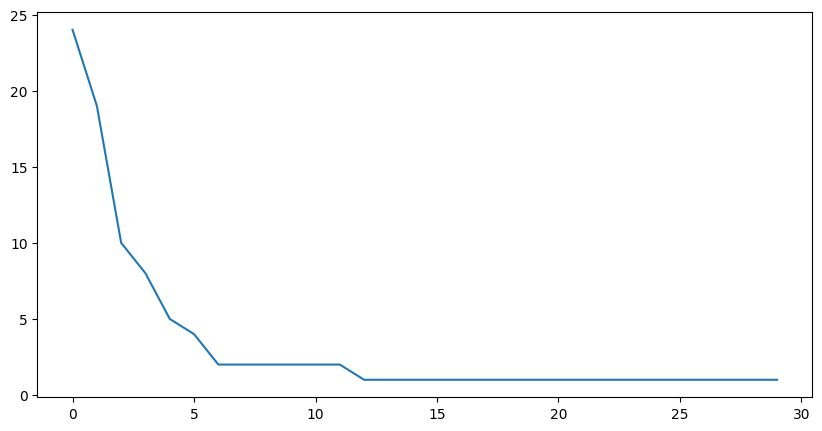

In [40]:
# turn it into a function

def plot_name_dist(data, ax):   
    names = json.loads(data)['names_counter']
    ax.plot(list(names.values()),label='log of name distribution')
    # turn off xticks
    

fig, ax = plt.subplots(1,1,figsize=(10,5))

plot_name_dist(data[0], ax)

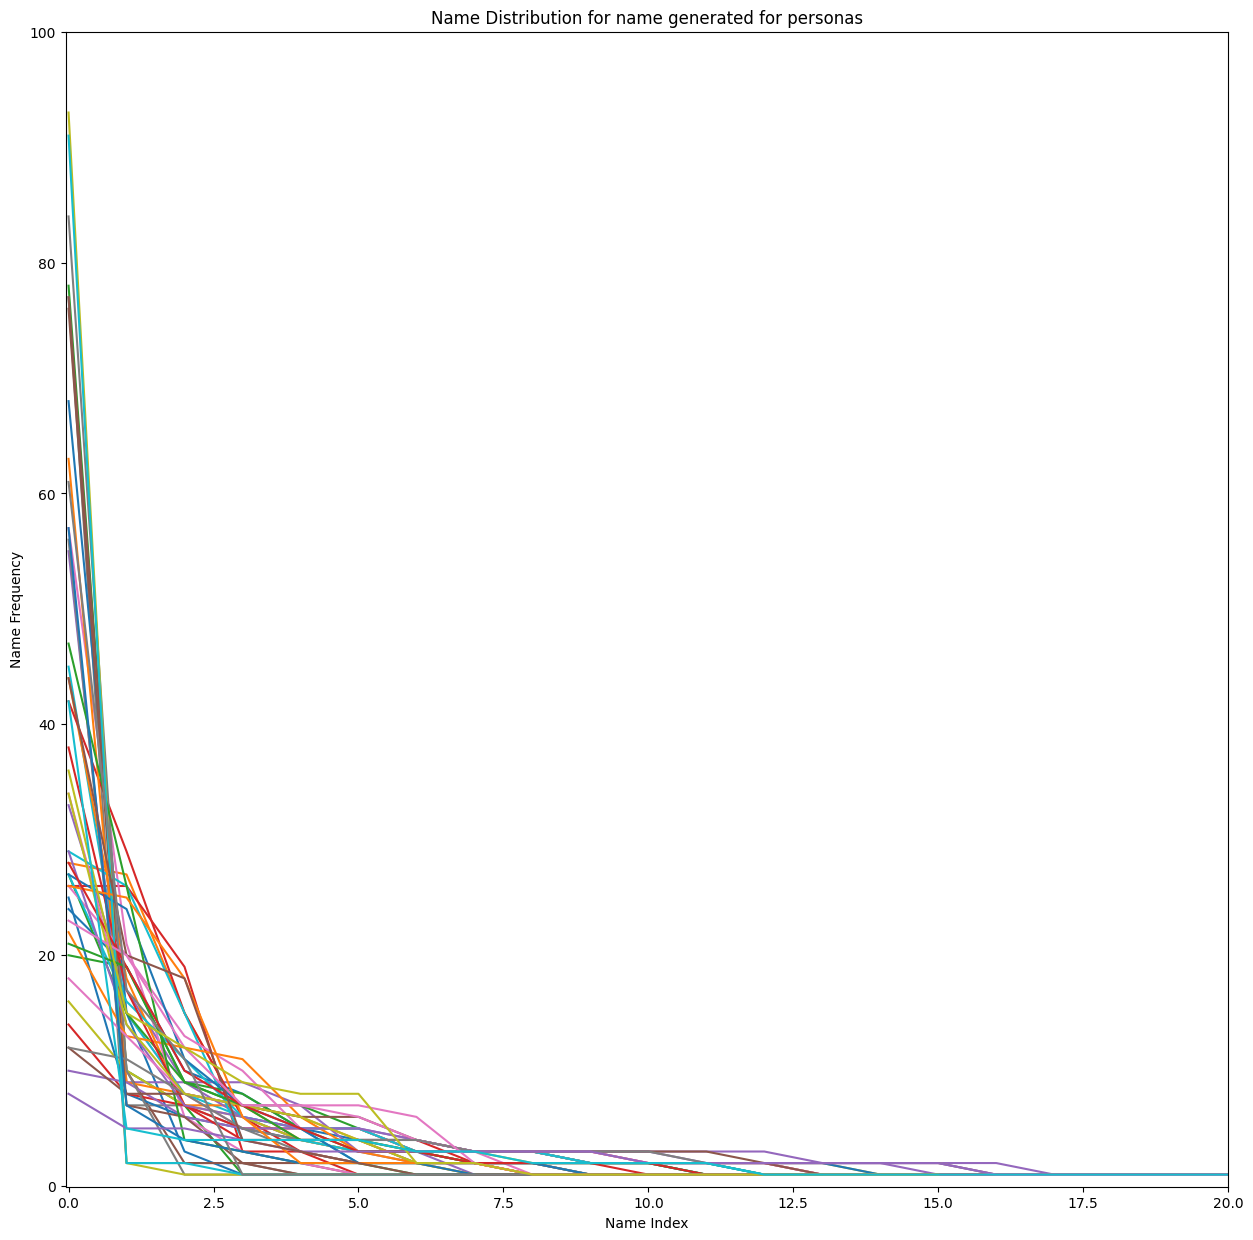

In [50]:
## do it for all personas

fig, ax= plt.subplots(1,1,figsize=(15,15))

for i in range(50):
    plot_name_dist(data[i], ax)

ax.set_xlim(-.05,20)
ax.set_ylim(-.05,100)

ax.set_xlabel('Name Index')

ax.set_ylabel('Name Frequency')

ax.set_title('Name Distribution for frequency of names generated for 50 personas')
    
plt.show()

/tmp/ipykernel_2947278/2044670212.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(list(json.loads(data[i])['names_counter'].values()), ax=ax)
/tmp/ipykernel_2947278/2044670212.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(list(json.loads(data[i])['names_counter'].values()), ax=ax)


Text(0.5, 1.0, 'Name Distribution for name generated for personas')

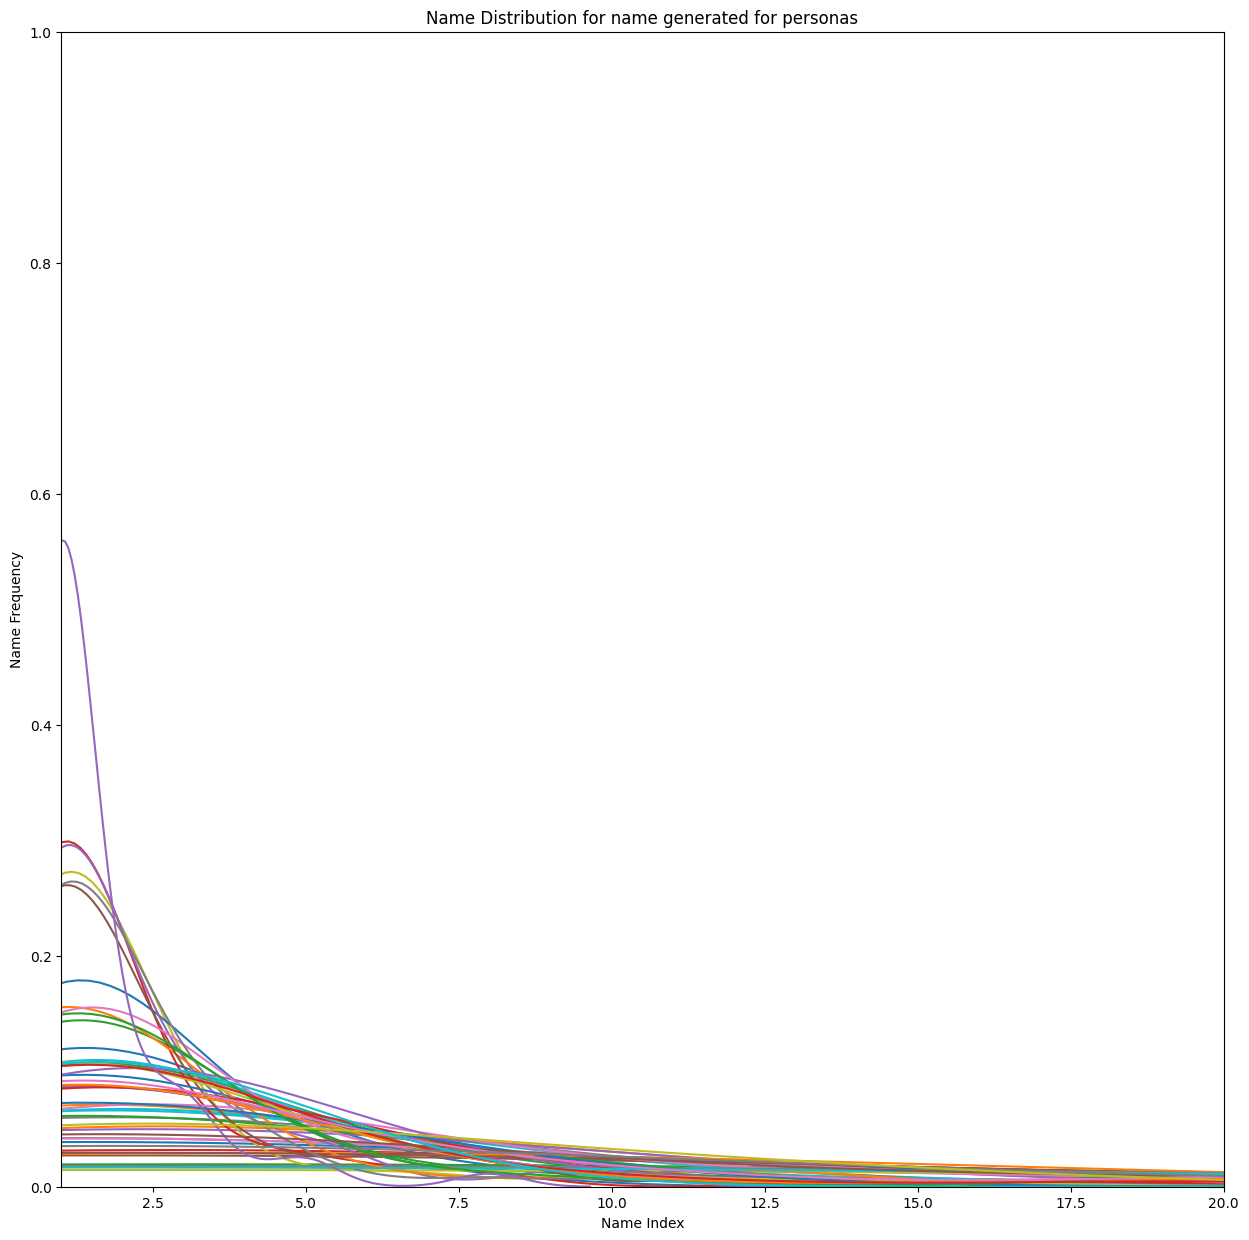

In [56]:
# make the same thing but as a kde plot

import seaborn as sns

fig, ax= plt.subplots(1,1,figsize=(15,15))

for i in range(50):
    sns.kdeplot(list(json.loads(data[i])['names_counter'].values()), ax=ax)

ax.set_xlim(1,20)

ax.set_ylim(0,1)

ax.set_xlabel('Name Index')

ax.set_ylabel('Name Frequency')

ax.set_title('Name Distribution for names generated for 50 personas')

In [60]:
## calculate median and average freq of the freq of the top name

most_frq_name_count = []

for i in range(50):
    names = json.loads(data[i])['names_counter']
    most_frq_name_count.append(list(names.values())[0])
    
print(f"Average frequency of the most frequent name: {np.mean(most_frq_name_count)}")
print(f"Median frequency of the most frequent name: {np.median(most_frq_name_count)}")

Average frequency of the most frequent name: 42.6
Median frequency of the most frequent name: 34.0


In [66]:
## calc gini index

def gini(x):
    n = len(x)
    x = np.sort(x)
    index = np.arange(1, n+1)
    return ((np.sum((2*index - n - 1)*x))/(n*np.sum(x)))

gini_index = []

for i in range(50):
    names = json.loads(data[i])['names_counter']
    gini_index.append(gini(list(names.values())))

In [67]:
np.mean(gini_index)

0.5949518364465285